# Assignment I Task-3

**Task-3** Clustering on Landsat Satellite Data (3 marks): The data set consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the label information associated with the central pixel in each neighbourhood. This data set was generated from Landsat Multi-Spectral Scanner image data. To facilitate your data analysis process, we have done sampling and data pre-processing for you. All the features are named as “Feature #”, and the last attribute is the label (each number corresponds to a class). This is a multi-class classification problem.

Notes:

1). Note that clustering is unsupervised learning and the label information should NOT be used in the training stage. But the label information can be used to test the performance if a metric like ARI (adjusted Rand index) is used for evaluation.

2). You need to tune the hyperparameter K for KMeans clustering. Or, you could run the hierarchical agglomerative clustering on a small sample set to select the value for K with the help of dendrogram visualization.


In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score

C:\Users\abuwa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data=pd.read_csv('data/landsat/landsat.csv')
data

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Label
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,51,68,85,71,51,75,93,79,55,75,...,79,56,81,97,79,52,73,93,79,1
5996,55,75,96,79,55,72,93,71,55,72,...,79,52,66,86,72,52,66,82,68,1
5997,55,72,93,71,55,72,85,75,59,79,...,72,52,66,82,68,56,70,82,72,1
5998,55,72,85,75,59,79,93,75,59,91,...,68,56,70,82,72,56,84,97,79,1


In [3]:
# Let us specify our feature and target (i.e. Label) attribute

X = data.drop(['Label'], axis='columns') #X should not have the label values and hence we drop it
y = data['Label'].values #Storing Label values seperately in y
print(X,y)


      Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0            92        115        120         94         84        102   
1            84        102        106         79         84        102   
2            84        102        102         83         80        102   
3            80        102        102         79         84         94   
4            84         94        102         79         80         94   
...         ...        ...        ...        ...        ...        ...   
5995         51         68         85         71         51         75   
5996         55         75         96         79         55         72   
5997         55         72         93         71         55         72   
5998         55         72         85         75         59         79   
5999         59         79         93         75         59         91   

      Feature 7  Feature 8  Feature 9  Feature 10  ...  Feature 27  \
0           106         79         84    

In [4]:
#Let us try different values of k for our k means 
distortions = []

for i in range(2,10):
    
    kmeanModel = KMeans(n_clusters = i)
    kmeanModel.fit(X) #build model for each value of k
    distortions.append(kmeanModel.inertia_)

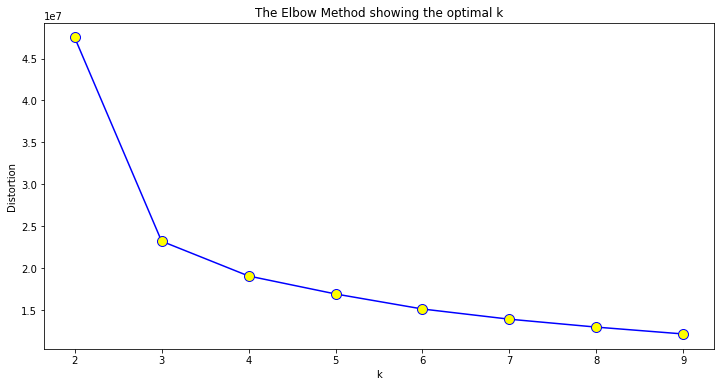

As we can see from the above graph, the point of inflection is when k = 3.
Hence, by using the elbow method, we select k = 3.


In [5]:
#We will now plot a graph and use the elbow method to find an optimal candidate value for k

plt.figure(figsize = (12,6))
plt.plot(range(2,10), distortions, color='blue', marker='o', markerfacecolor='yellow', markersize=10)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print("As we can see from the above graph, the point of inflection is when k = 3.")
print("Hence, by using the elbow method, we select k = 3.")

In [6]:
#Now we build our model with the value k = 3
finalClustering = KMeans(n_clusters = 3,init = 'k-means++',random_state = 142)
labels = finalClustering.fit_predict(X)

In [7]:
#Now, we will use another quality metric, davies bouldin (DB) score to confirm our previous observation from 
#the elbow method which showed that k should be 3

z, db = {},{}

for k in range(2,10): #For the same range of k, let us now calculate the DB score
    
    kmeans = KMeans(n_clusters=k,max_iter=1000,random_state=142).fit(X)
    labels = kmeans.labels_
    clusters = kmeans.labels_
    z[k] = kmeans.inertia_
    db[k] = davies_bouldin_score(X,clusters) #storing DB score for each k in a list
      


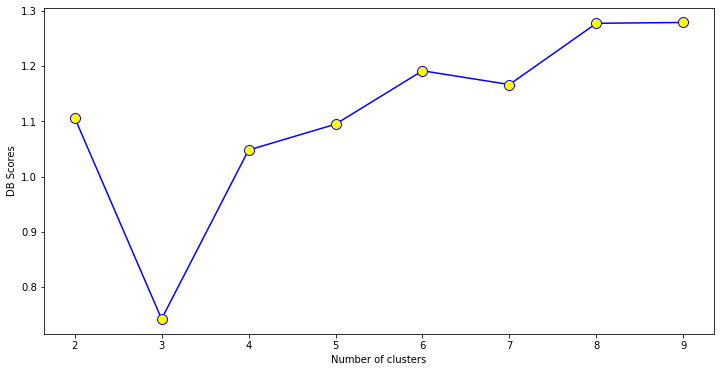

Another quality metric, Davies Bouldin Score is lowest when k = 3.
A lower DB score generally means better seperation of clusters and better tightening inside clusters.
Hence, this again confirms our initial observation from the elbow method that we should select k = 3


In [8]:
#Let us plot a graph of K and its related DB scores.
plt.figure(figsize = (12,6))
plt.plot(list(db.keys()), list(db.values()),color='blue', marker='o', markerfacecolor='yellow', markersize=10)
plt.xlabel("Number of clusters")
plt.ylabel("DB Scores")
plt.show()
print("Another quality metric, Davies Bouldin Score is lowest when k = 3.")
print("A lower DB score generally means better seperation of clusters and better tightening inside clusters.")
print("Hence, this again confirms our initial observation from the elbow method that we should select k = 3")